# Linear Regression Practical Implementation

## 1. Divide the dataset into independent and dependent features.

## 2. Divide the model into train and test.

## 3. Feature scaling

## 4. Model training

## 5. Model fit

## 6. Coefficients and intercept

## 7. MSE, MAE, RMSE

In [1]:
from sklearn.datasets import fetch_california_housing

In [3]:
dataset=fetch_california_housing()

In [4]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
print(dataset.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [8]:
print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
print(dataset.target_names)

['MedHouseVal']


In [11]:
import pandas as pd
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
df['Price']=dataset.target

In [14]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [17]:
import seaborn as sns

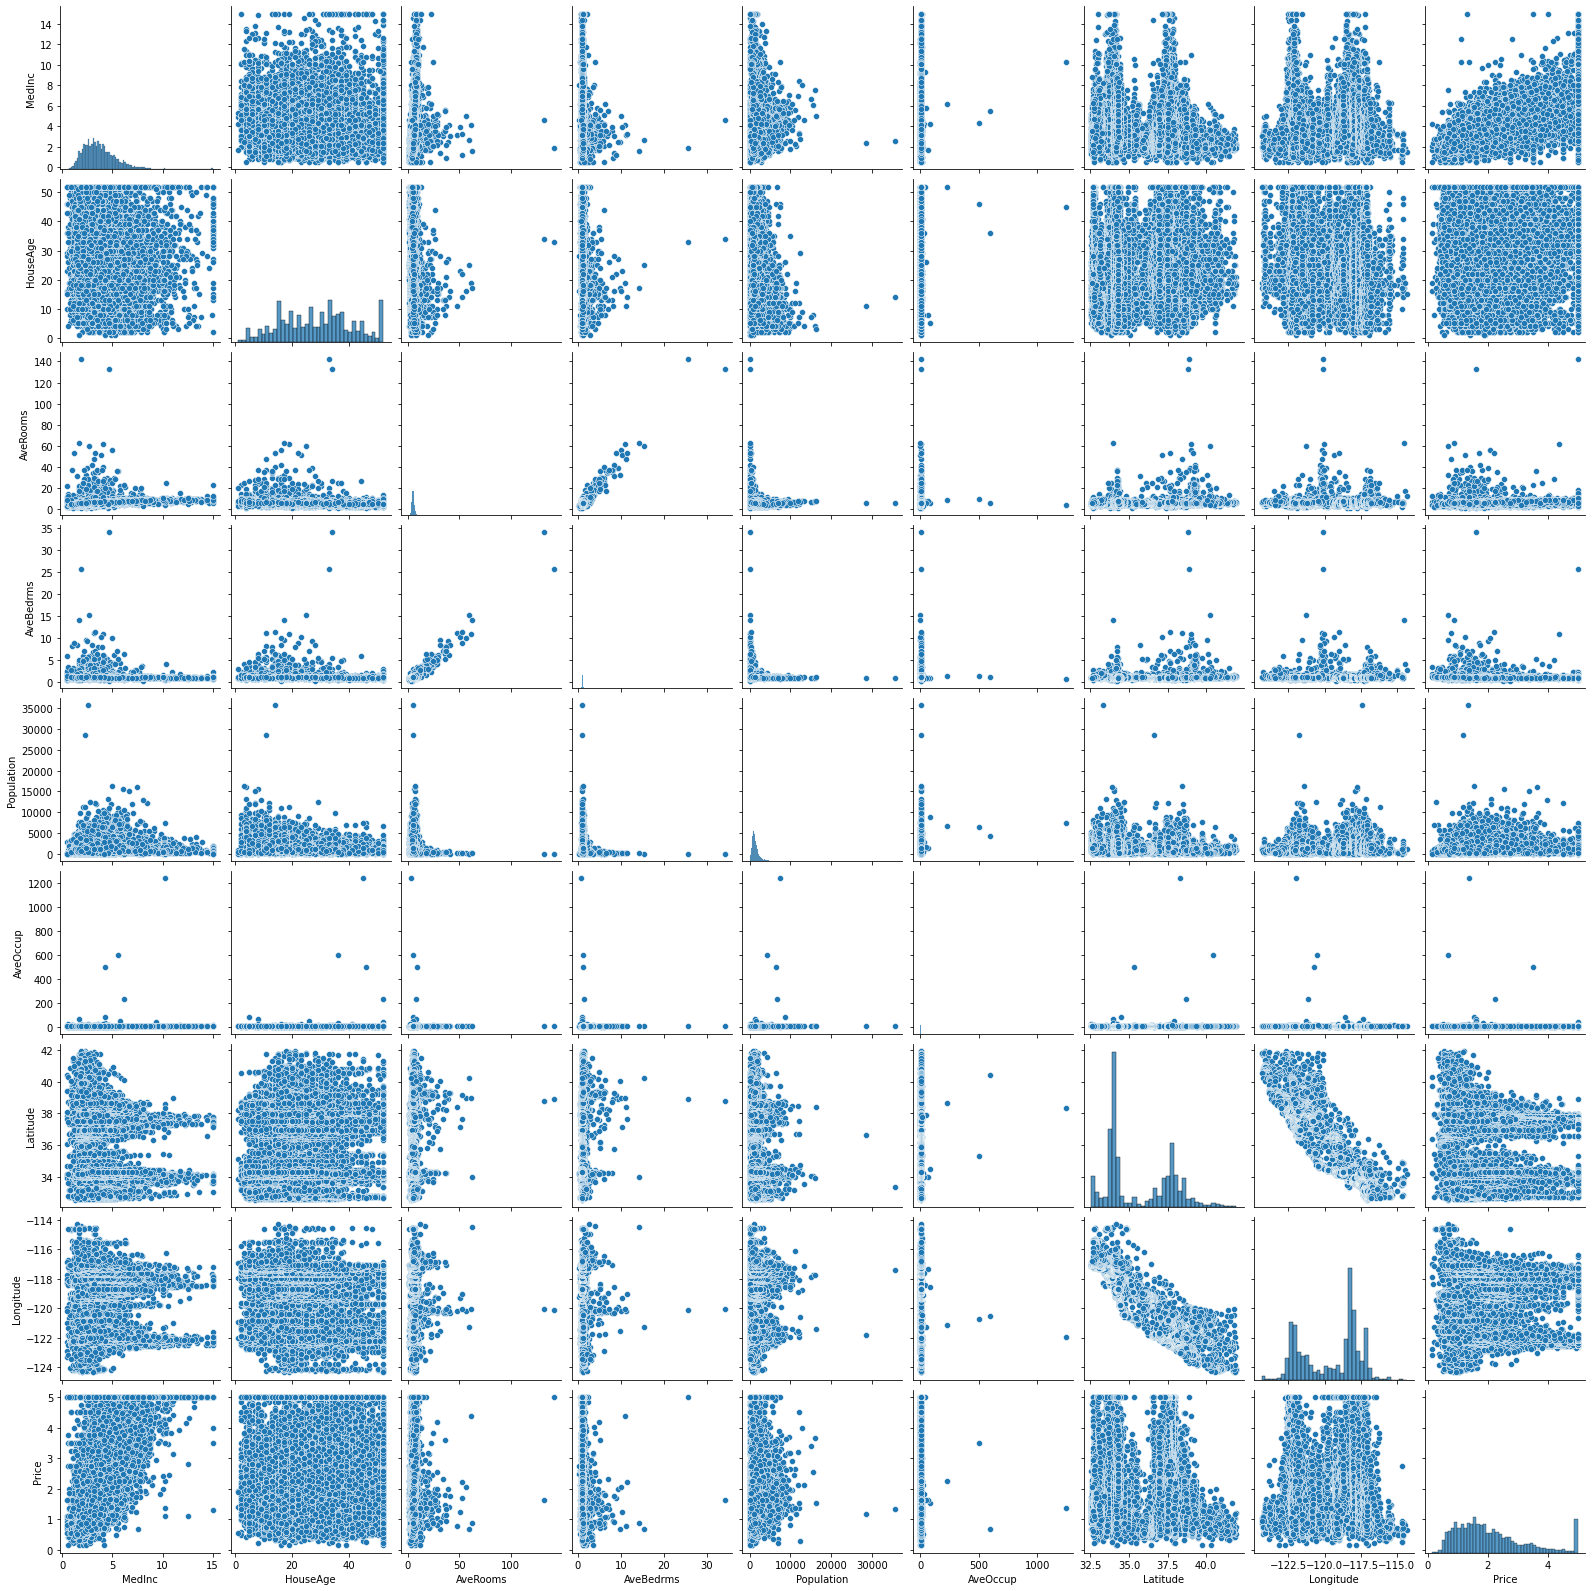

In [18]:
sns.pairplot(df)

In [19]:
df_copy=df.sample(frac=0.25)

In [20]:
df_copy.shape

(5160, 9)

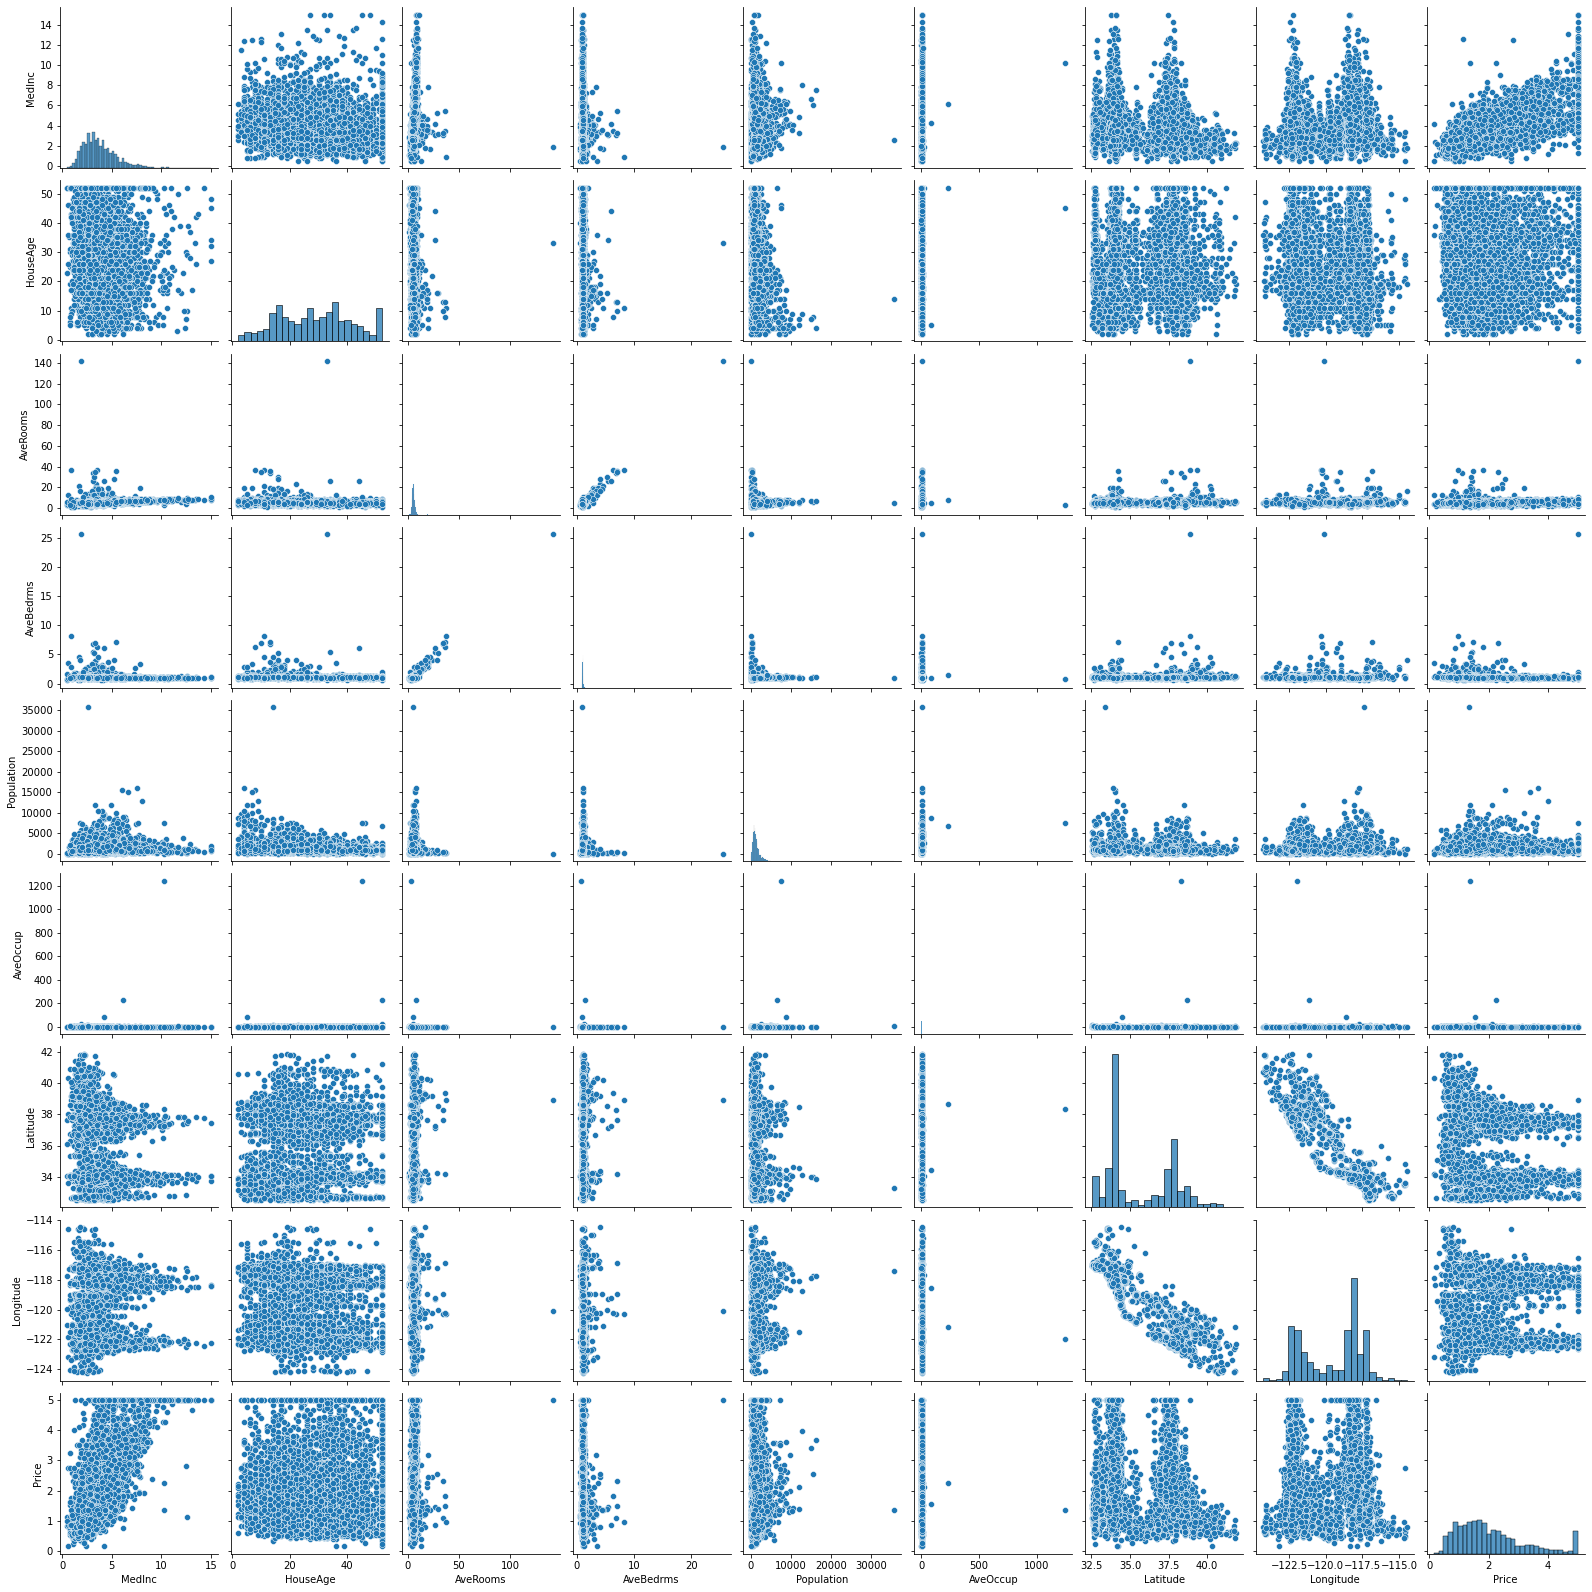

In [21]:
sns.pairplot(df_copy)

## 1. Divide the dataset into independent and dependent 

In [ ]:
X = df.iloc[:, :-1] #independent (all rows)
Y = df.iloc[:,-1] # dependent (all columns)

## 2. Use train test split and use it to split the dataset

In [23]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.33, random_state=36) 
#you can state any random state value

In [29]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
6556,9.5320,50.0,7.114428,0.925373,620.0,3.084577,34.19,-118.11
8399,2.8438,32.0,3.851986,1.032491,1053.0,3.801444,33.95,-118.37
17929,3.9250,35.0,5.056680,0.939271,556.0,2.251012,37.35,-121.97
19277,2.1864,29.0,4.031627,1.040663,1880.0,2.831325,38.43,-122.73
11910,3.8640,24.0,5.444714,1.094775,2398.0,2.913730,33.96,-117.41


In [30]:
X.shape

(20640, 8)

In [31]:
X_train.shape, X_test.shape

((13828, 8), (6812, 8))

## 3. Feature scaling

## Standardization uses the Z score method. Z=(xi-mean)/std dev, where mew=0, std dev=1

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [35]:
scaler.fit(X_train)

StandardScaler()

In [36]:
scaler.transform(X_train)

array([[ 2.94615603,  1.69257444,  0.65840852, ...,  0.00631568,
        -0.67676958,  0.7291751 ],
       [-0.53712836,  0.26178584, -0.61551141, ...,  0.10882511,
        -0.78878315,  0.59982719],
       [ 0.02597188,  0.50025061, -0.14510172, ..., -0.11288116,
         0.79807576, -1.19114398],
       ...,
       [-0.46390242,  0.57973886, -0.72060079, ...,  0.24671234,
        -0.77478146,  0.69932558],
       [ 0.03045085, -0.85104973,  0.29681501, ..., -0.04515438,
         1.27880067, -1.66873629],
       [ 0.48355594, -0.69207322, -0.02275645, ..., -0.12518059,
         0.95676166, -1.25084302]])

In [37]:
X_train=scaler.fit_transform(X_train)

In [38]:
X_train

array([[ 2.94615603,  1.69257444,  0.65840852, ...,  0.00631568,
        -0.67676958,  0.7291751 ],
       [-0.53712836,  0.26178584, -0.61551141, ...,  0.10882511,
        -0.78878315,  0.59982719],
       [ 0.02597188,  0.50025061, -0.14510172, ..., -0.11288116,
         0.79807576, -1.19114398],
       ...,
       [-0.46390242,  0.57973886, -0.72060079, ...,  0.24671234,
        -0.77478146,  0.69932558],
       [ 0.03045085, -0.85104973,  0.29681501, ..., -0.04515438,
         1.27880067, -1.66873629],
       [ 0.48355594, -0.69207322, -0.02275645, ..., -0.12518059,
         0.95676166, -1.25084302]])

In [40]:
X_test=scaler.transform(X_test)

## 4. Model training

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
regression = LinearRegression()

In [43]:
regression.fit(X_train,Y_train)

LinearRegression()

In [44]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 6. Coefficients and intercept

In [45]:
regression.coef_ # minus means decreasing the price, positive means increasing price.

array([ 0.83700024,  0.12271899, -0.26347102,  0.30713139, -0.0081633 ,
       -0.02764702, -0.90609856, -0.87576409])

In [46]:
regression.intercept_

2.0708259184263804

## Prediction of the new model

In [47]:
Y_pred=regression.predict(X_test)

## 7. MSE, MAE, RMSE

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [72]:
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
print (mse)
print (mae)
import numpy as np
print(np.sqrt(mse))

0.5335039735183067
0.540892407475728
0.730413563344977


## Accuracy R2 and adjusted R squared.

In [56]:
from sklearn.metrics import r2_score

In [60]:
score = r2_score(Y_test, Y_pred)

In [61]:
score

0.5875394343499214

In [64]:
#display adjusted R-squared

adjusted_rsqr = 1 - (1-score)*(len(Y)-1)/(len(Y)-X.shape[1]-1)

In [66]:
adjusted_rsqr

0.5873794961731389

## adjusted r squared mean will always be less than r squared mean.

In [69]:
diff = score - adjusted_rsqr
diff

0.00015993817678250366

## Using Ridge, Lasso or ElasticNet

In [67]:
from sklearn.linear_model import Ridge

In [76]:
ridge = Ridge(alpha=20)
ridge.fit(X_train, Y_train)

Ridge(alpha=20)

In [77]:
Y_pred=ridge.predict(X_test)

In [78]:
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
print (mse)
print (mae)
import numpy as np
print(np.sqrt(mse))

0.5335706984910803
0.5408065397594833
0.7304592380763489


## You don't get much of a change because you haven't changed the alpha value. If you change the alpha value then...

In [79]:
from sklearn.linear_model import Lasso

In [80]:
lasso = Lasso(alpha=20)
lasso.fit(X_train, Y_train)

Lasso(alpha=20)

In [81]:
Y_pred=lasso.predict(X_test)

In [84]:
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
print (mse)
print (mae)
import numpy as np
print(np.sqrt(mse))

1.2935112672240048
0.9000629779192262
1.1373263679454568


In [85]:
from sklearn.linear_model import ElasticNet

In [86]:
elasticnet = ElasticNet(alpha=20)
elasticnet.fit(X_train, Y_train)

ElasticNet(alpha=20)

In [87]:
Y_pred=elasticnet.predict(X_test)

In [88]:
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
print (mse)
print (mae)
import numpy as np
print(np.sqrt(mse))

1.2935112672240048
0.9000629779192262
1.1373263679454568
